# Projeto - Casas para alugar

### Para iniciar, importarei as bibliotecas necessárias para a realização do relatório.

In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Importando a base de dados "casas_para_alugar.csv"

In [16]:
imoveis_db = pd.read_csv('Databases\casas_para_aluguel.csv', sep=';')
imoveis_db.head(3)

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,Sao Paulo,70,2,1,1,7,sim,sim,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,sim,nao,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,sim,nao,1000,2800,0,41,3841


### Quais são as informações contidas nessa base de dados?

In [21]:
imoveis_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cidade                10692 non-null  object
 1   area                  10692 non-null  int64 
 2   quartos               10692 non-null  int64 
 3   banheiros             10692 non-null  int64 
 4   vagas_estacionamento  10692 non-null  int64 
 5   andar                 10692 non-null  object
 6   animal                10692 non-null  object
 7   mobiliado             10692 non-null  object
 8   taxa_condominio       10692 non-null  int64 
 9   preco_aluguel         10692 non-null  int64 
 10  taxa_iptu             10692 non-null  int64 
 11  taxa_incendio         10692 non-null  int64 
 12  total_aluguel         10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


#### Temos 13 colunas de informação e 10692 registros. Não há informação faltando (nula)

In [23]:
# Para ter uma noção estatística geral dos valores, podemos executar o describe.
# Esse output nos trás uma noção, porém é muito genérico, devemos tratar e filtrar as informações.

imoveis_db.describe().round(2)

,area,quartos,banheiros,vagas_estacionamento,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


## Quais são as cidades em que os imóveis estão situados e qual o número de imóveis por cidade?

In [237]:
cidades = imoveis_db['cidade'].value_counts()
cidades

# São 5 cidades

Sao Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: cidade, dtype: int64

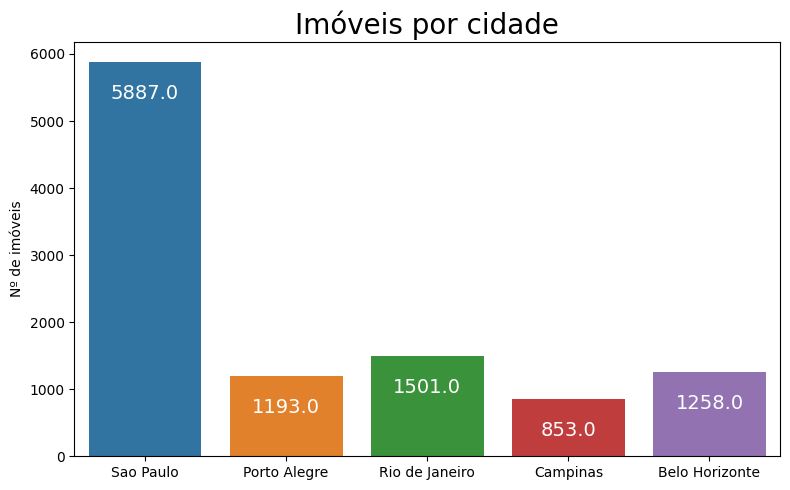

In [93]:
plt.figure(figsize=(8,5))
cidades_gr = sns.countplot(x = imoveis_db['cidade'])
cidades_gr.set_title('Imóveis por cidade', fontsize = 20)
cidades_gr.set(xlabel='', ylabel= 'Nº de imóveis')

for p in cidades_gr.patches:
    cidades_gr.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='white', size=14)

plt.tight_layout()
plt.show()

### Qual é o valor médio do aluguel em cada cidade?

In [238]:
media_aluguel_cidades = pd.DataFrame(imoveis_db.groupby('cidade')['total_aluguel'].mean().round(2))
media_aluguel_cidades

,total_aluguel
cidade,
Belo Horizonte,6315.24
Campinas,3173.28
Porto Alegre,2989.78
Rio de Janeiro,4611.68
Sao Paulo,6380.83


C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\2449970358.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  media_aluguel_cidades_gr = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'],


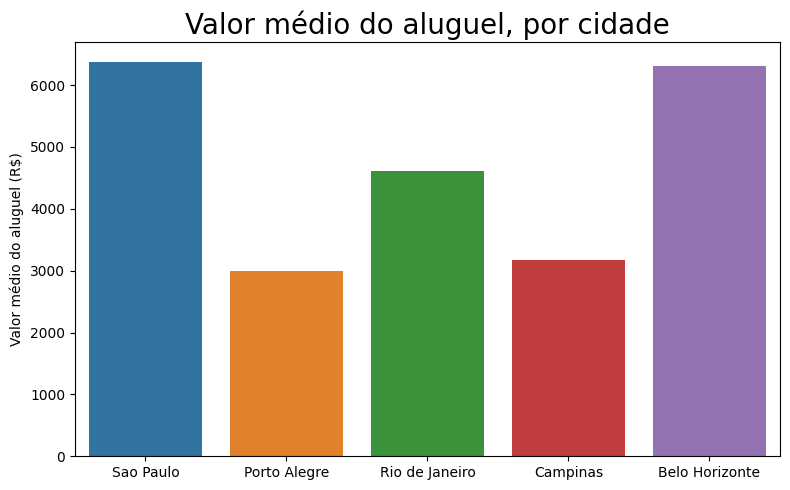

In [174]:
plt.figure(figsize=(8,5))

media_aluguel_cidades_gr = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], ci=False)

#A idéia era colocar rótulo de dados e ordenar do maior para o menor, mas ainda não conheço bem os comandos

media_aluguel_cidades_gr.set_title('Valor médio do aluguel, por cidade', fontsize = 20)
media_aluguel_cidades_gr.set(xlabel='', ylabel= 'Valor médio do aluguel (R$)')


plt.tight_layout()

plt.show()

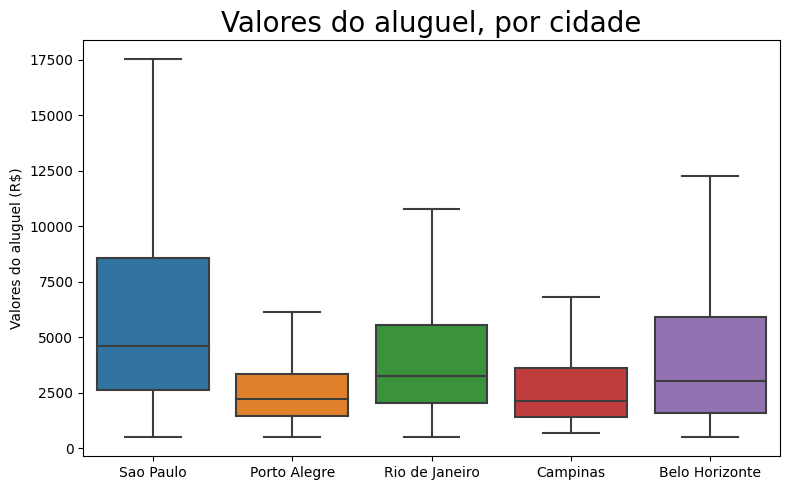

In [178]:
plt.figure(figsize=(8,5))

media_aluguel_cidades_bp = sns.boxplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], showfliers = False)

#A idéia era colocar rótulo de dados e ordenar do maior para o menor, mas ainda não conheço bem os comandos

media_aluguel_cidades_bp.set_title('Valores do aluguel, por cidade', fontsize = 20)
media_aluguel_cidades_bp.set(xlabel='', ylabel= 'Valores do aluguel (R$)')


plt.tight_layout()

plt.show()

### Os imóveis possuem, em média, qual área?

In [239]:
media_area_cidades = pd.DataFrame(imoveis_db.groupby('cidade')['area'].mean().round(2))
media_area_cidades

,area
cidade,
Belo Horizonte,207.41
Campinas,137.56
Porto Alegre,103.61
Rio de Janeiro,105.35
Sao Paulo,158.90


### Imóveis mobiliados alteram o valor do aluguel?

C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\761670473.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  imoveis_mobiliados = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], hue=imoveis_db['mobiliado'], ci= False, estimator=np.median)


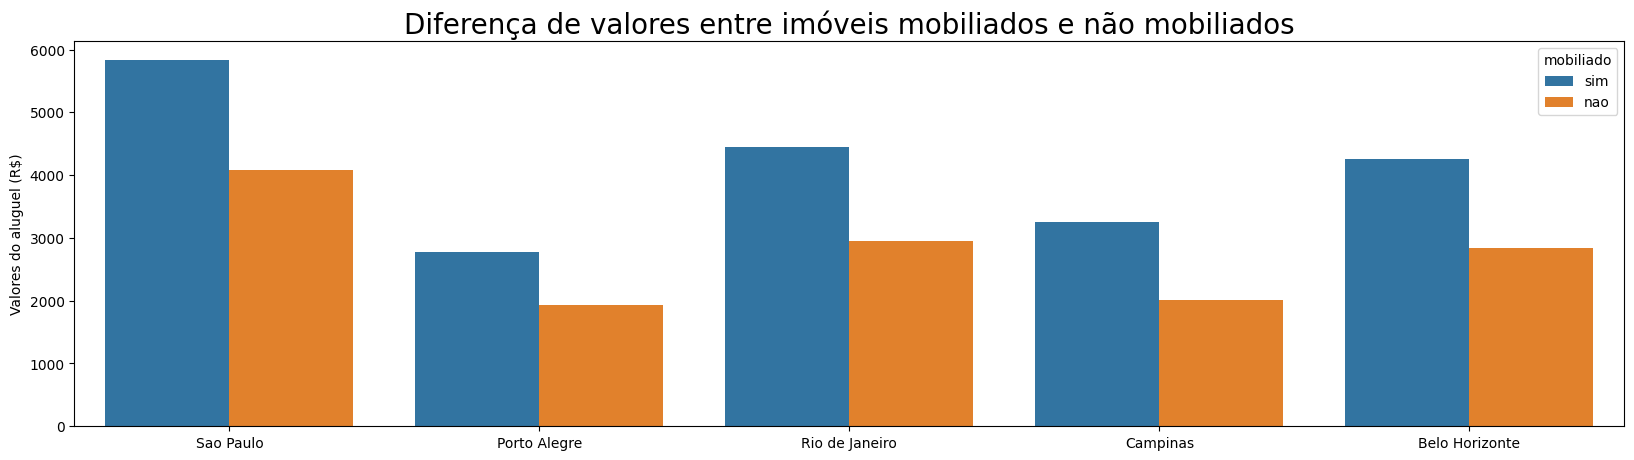

In [191]:
plt.figure(figsize=(20,5))
imoveis_mobiliados = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], hue=imoveis_db['mobiliado'], ci= False, estimator=np.median)
imoveis_mobiliados.set_title('Diferença de valores entre imóveis mobiliados e não mobiliados', fontsize = 20)
imoveis_mobiliados.set(xlabel='', ylabel= 'Valores do aluguel (R$)')
plt.show()

### Existe diferença no valor do aluguel de imóveis que aceitam animais?

C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\863764470.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  imoveis_mobiliados = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], hue=imoveis_db['animal'], ci= False, estimator=np.median)


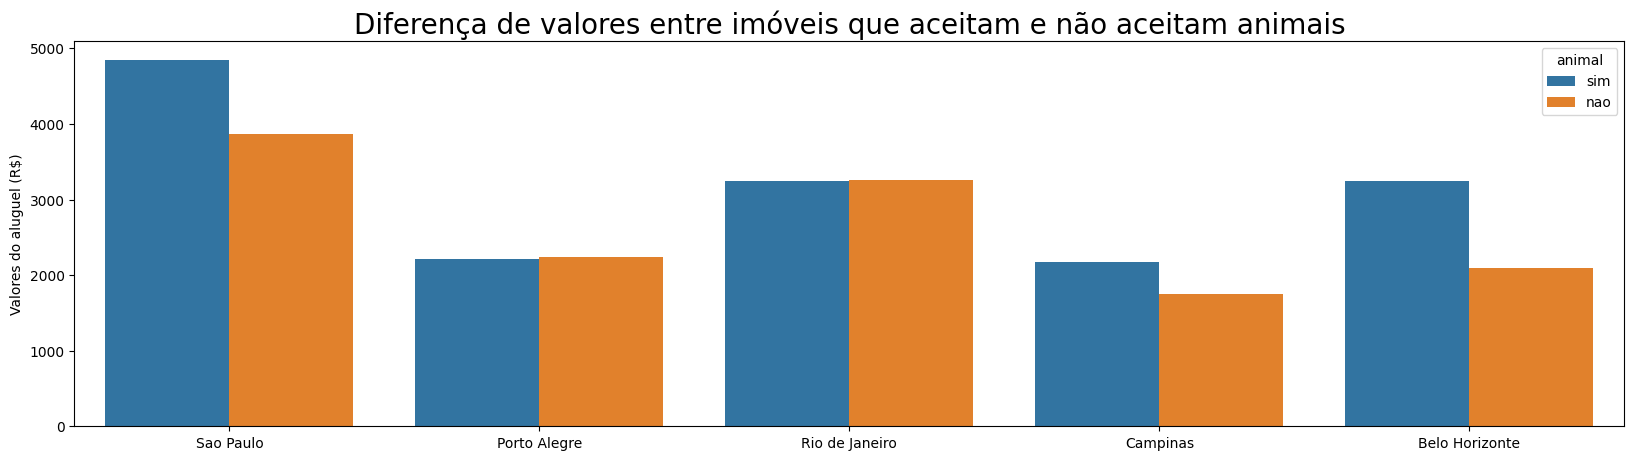

In [190]:
plt.figure(figsize=(20,5))
imoveis_mobiliados = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], hue=imoveis_db['animal'], ci= False, estimator=np.median)
imoveis_mobiliados.set_title('Diferença de valores entre imóveis que aceitam e não aceitam animais', fontsize = 20)
imoveis_mobiliados.set(xlabel='', ylabel= 'Valores do aluguel (R$)')
plt.show()

### Possuir vagas de estacionamento, altera o valor do aluguel?

In [201]:
#Criando filtros para imóveis com estacionamento e imóveis sem estacionamento

imoveis_sem_estacionamento = (imoveis_db['vagas_estacionamento'] == 0)
imoveis_sem_estacionamento_df = imoveis_db[imoveis_sem_estacionamento]

imoveis_com_estacionamento = (imoveis_db['vagas_estacionamento'] != 0)
imoveis_com_estacionamento_df = imoveis_db[imoveis_com_estacionamento]



8009, 2683


C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\2936279017.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  vagas_estacionamento = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], hue=imoveis_com_estacionamento, ci= False, estimator=np.median)


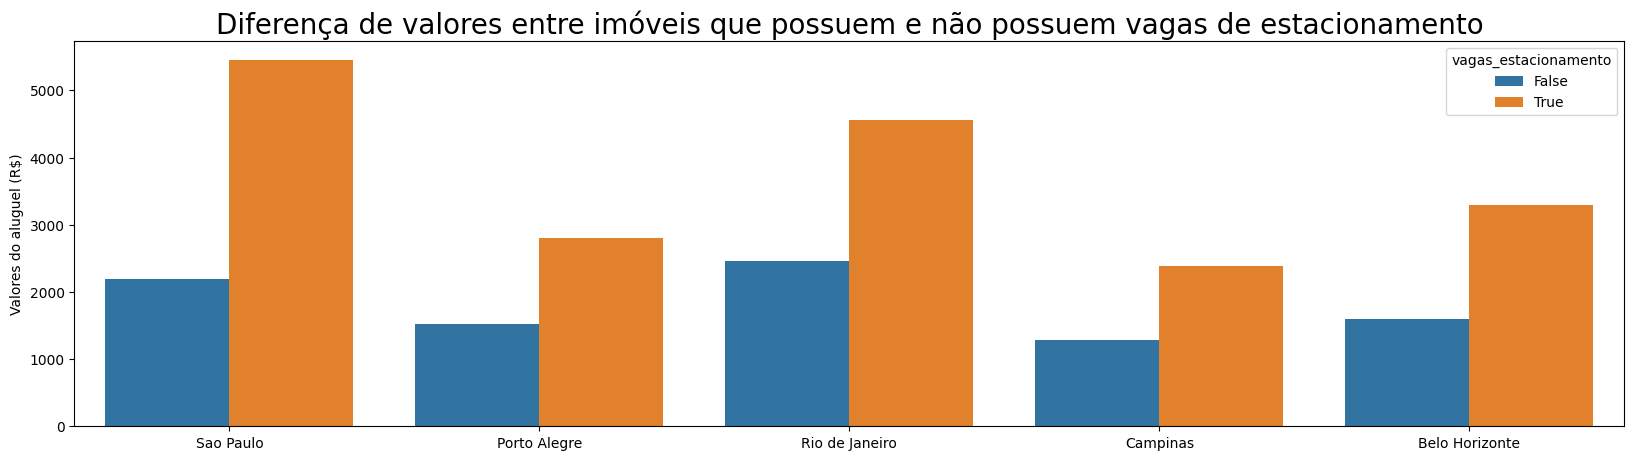

In [214]:
plt.figure(figsize=(20,5))
vagas_estacionamento = sns.barplot(x=imoveis_db['cidade'], y=imoveis_db['total_aluguel'], hue=imoveis_com_estacionamento, ci= False, estimator=np.median)
vagas_estacionamento.set_title('Diferença de valores entre imóveis que possuem e não possuem vagas de estacionamento', fontsize = 20)
vagas_estacionamento.set(xlabel='', ylabel= 'Valores do aluguel (R$)')
plt.show()

### Quanto ao número de quartos, o que ele diz sobre o valor do aluguel?

In [219]:
#Determinando quantas variáveis existem, quanto ao número de quartos
imoveis_db['quartos'].unique()

array([ 2,  4,  1,  3,  7,  5,  8,  6, 10, 13,  9], dtype=int64)

C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\4205633218.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  quartos_cp = sns.barplot(x = imoveis_db['quartos'], y=imoveis_db['total_aluguel'], ci= False, estimator=np.median)


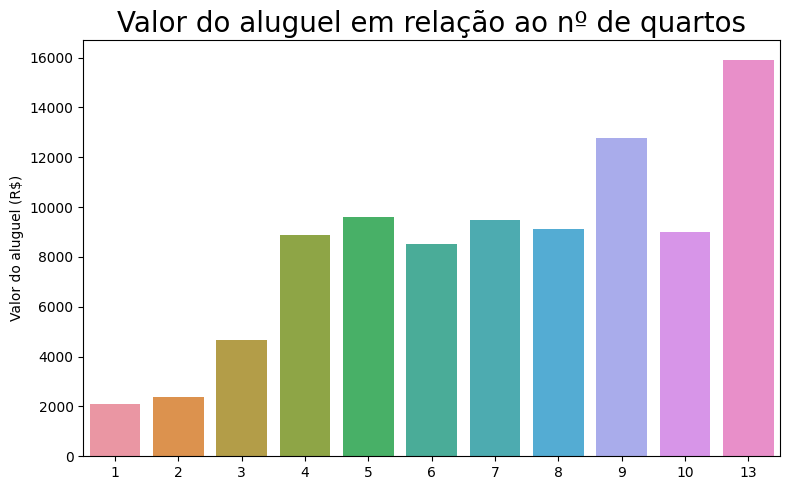

In [233]:
plt.figure(figsize=(8,5))
quartos_cp = sns.barplot(x = imoveis_db['quartos'], y=imoveis_db['total_aluguel'], ci= False, estimator=np.median)
quartos_cp.set_title('Valor do aluguel em relação ao nº de quartos', fontsize = 20)
quartos_cp.set(xlabel='', ylabel= 'Valor do aluguel (R$)')

plt.tight_layout()
plt.show()

### Quanto ao número de banheiro, o que ele diz sobre o valor do aluguel?

In [228]:
# Determinando quantas variáveis existem, quanto ao número de banheiros
imoveis_db['banheiros'].unique()

array([ 1,  4,  3,  2,  6,  5,  7,  9,  8, 10], dtype=int64)

C:\Users\mathe\AppData\Local\Temp\ipykernel_4968\2084666569.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  banheiros_cp = sns.barplot(x = imoveis_db['banheiros'], y=imoveis_db['total_aluguel'], ci= False, estimator=np.median)


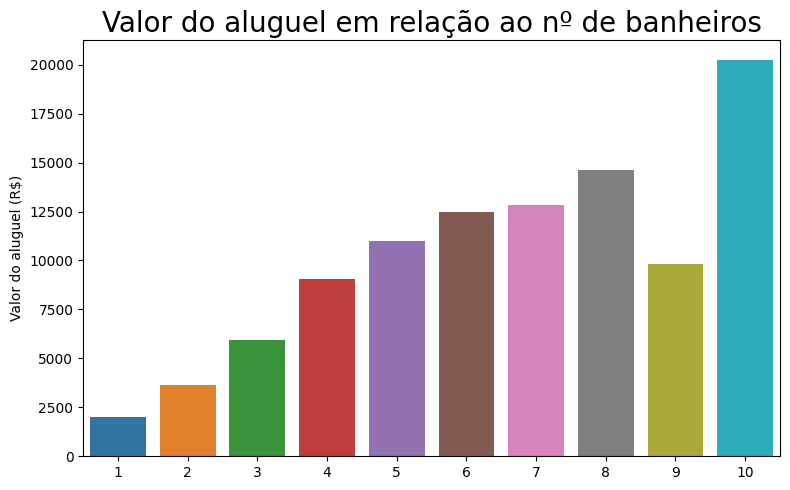

In [232]:
plt.figure(figsize=(8,5))
banheiros_cp = sns.barplot(x = imoveis_db['banheiros'], y=imoveis_db['total_aluguel'], ci= False, estimator=np.median)
banheiros_cp.set_title('Valor do aluguel em relação ao nº de banheiros', fontsize = 20)
banheiros_cp.set(xlabel='', ylabel= 'Valor do aluguel (R$)')

plt.tight_layout()
plt.show()